# Árbol de decisión pata especies de flores

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

In [4]:
import matplotlib.pyplot as plt

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

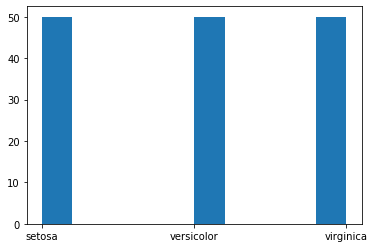

In [5]:
plt.hist(data.Species)

In [6]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [8]:
import numpy as np

In [9]:
data["is_train"] = np.random.uniform(0, 1, len(data)) <= 0.75

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

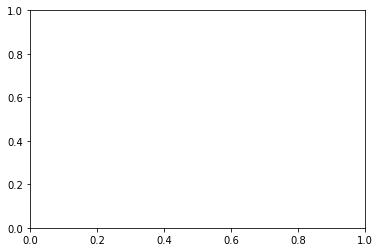

In [10]:
plt.hist(data.is_train)

In [11]:
train, test = data[data["is_train"] == True], data[data["is_train"] == False]

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [15]:
preds = tree.predict(test[predictors])

In [16]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,7,0,0
versicolor,0,8,1
virginica,0,1,12
